# Artificial Intelligence
# 464/664
# Assignment #7

## General Directions for this Assignment

00. We're using a Jupyter Notebook environment (tutorial available here: https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html),
01. Output format should be exactly as requested (it is your responsibility to make sure notebook looks as expected on Gradescope),
02. Check submission deadline on Gradescope,
03. Rename the file to Last_First_assignment_7,
04. Submit your notebook (as .ipynb, not PDF) using Gradescope, and
05. Do not submit any other files.

## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".

## Neural Networks: Architecture

For this assignment we will explore Neural Networks; in particular, we are going to explore model complexity. We will use the same dataset from Assignment #6 to classify a mushroom as either edible ('e') or poisonous ('p'). You are free to use PyTorch, TensorFlow, scikit-learn -- to name a few resources. The goal is to explore different model complexities (architectures) before declaring a winner. Either start with a simple network and make it more complex; or start with a complex model and pare it down. Either way, your submission should clearly demonstrate your exploration.


Your output for each model should look like the output of `cross_validate` from Assignment #6:

```
Fold: 0	Train Error: 15.38%	Validation Error: 0.00%
Fold: 1
...

Mean(Std. Dev.) over all folds:
-------------------------------
Train Error: 100.00%(0.00%) Test Error: 100.00%(0.00%)
```

Notice that "Test Error" has been replaced by "Validation Error." Split your dataset into train, test, and validation sets.


Start with a simple network. Train using the train set. Observe model's performance using the validation set.


Increase the complexity of your network. Train using the train set. Observe model's performance using the validation set.


Model complexity in Assignment #6 was depth limit. You can think of it here as the architecture of the network (number of layers and units per layer). Try at least three different network architectures.


We're trying to find a model complexity that generalizes well. (Recall high bias vs high variance discussion in class.)


Pick the network architecture that you deem best. Use the test set to report your winning model's performance. This is the ONLY time you use the test set.


Try at least three different models; more importantly, document your process: what the results were, how the winning model was determined, what was the winning model's performance on the test data. Clearly highlight these items to receive full credit.

## Importing necessary packages

In [1]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

## Loading and preprocessing agaricus-lepiota.data!

In [2]:
# Implementation and exploration.
mushrooms = pd.read_csv("agaricus-lepiota.data", names=["poisonous", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
           "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring",
           "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
           "ring-number", "ring-type", "spore-print-color", "population", "habitat"])
mushrooms.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
mushroom_features = mushrooms.copy()
mushroom_labels = mushroom_features.pop('poisonous')
# Convert 'e' and 'p' to 0 and 1, respectively
mushroom_labels = mushroom_labels.map({'e': 0, 'p': 1})

In [4]:
inputs = {}

for name, column in mushroom_features.items():
  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=tf.string)

inputs

{'cap-shape': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=cap-shape>,
 'cap-surface': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=cap-surface>,
 'cap-color': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=cap-color>,
 'bruises': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=bruises>,
 'odor': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=odor>,
 'gill-attachment': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=gill-attachment>,
 'gill-spacing': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=gill-spacing>,
 'gill-size': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=gill-size>,
 'gill-color': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=gill-color>,
 'stalk-shape': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=stalk-shape>,
 'stalk-root': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=stalk-root>,
 'sta

In [5]:
preprocessed_inputs = []

for name, input in inputs.items():
  lookup = layers.StringLookup(vocabulary=np.unique(mushroom_features[name]))
  one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

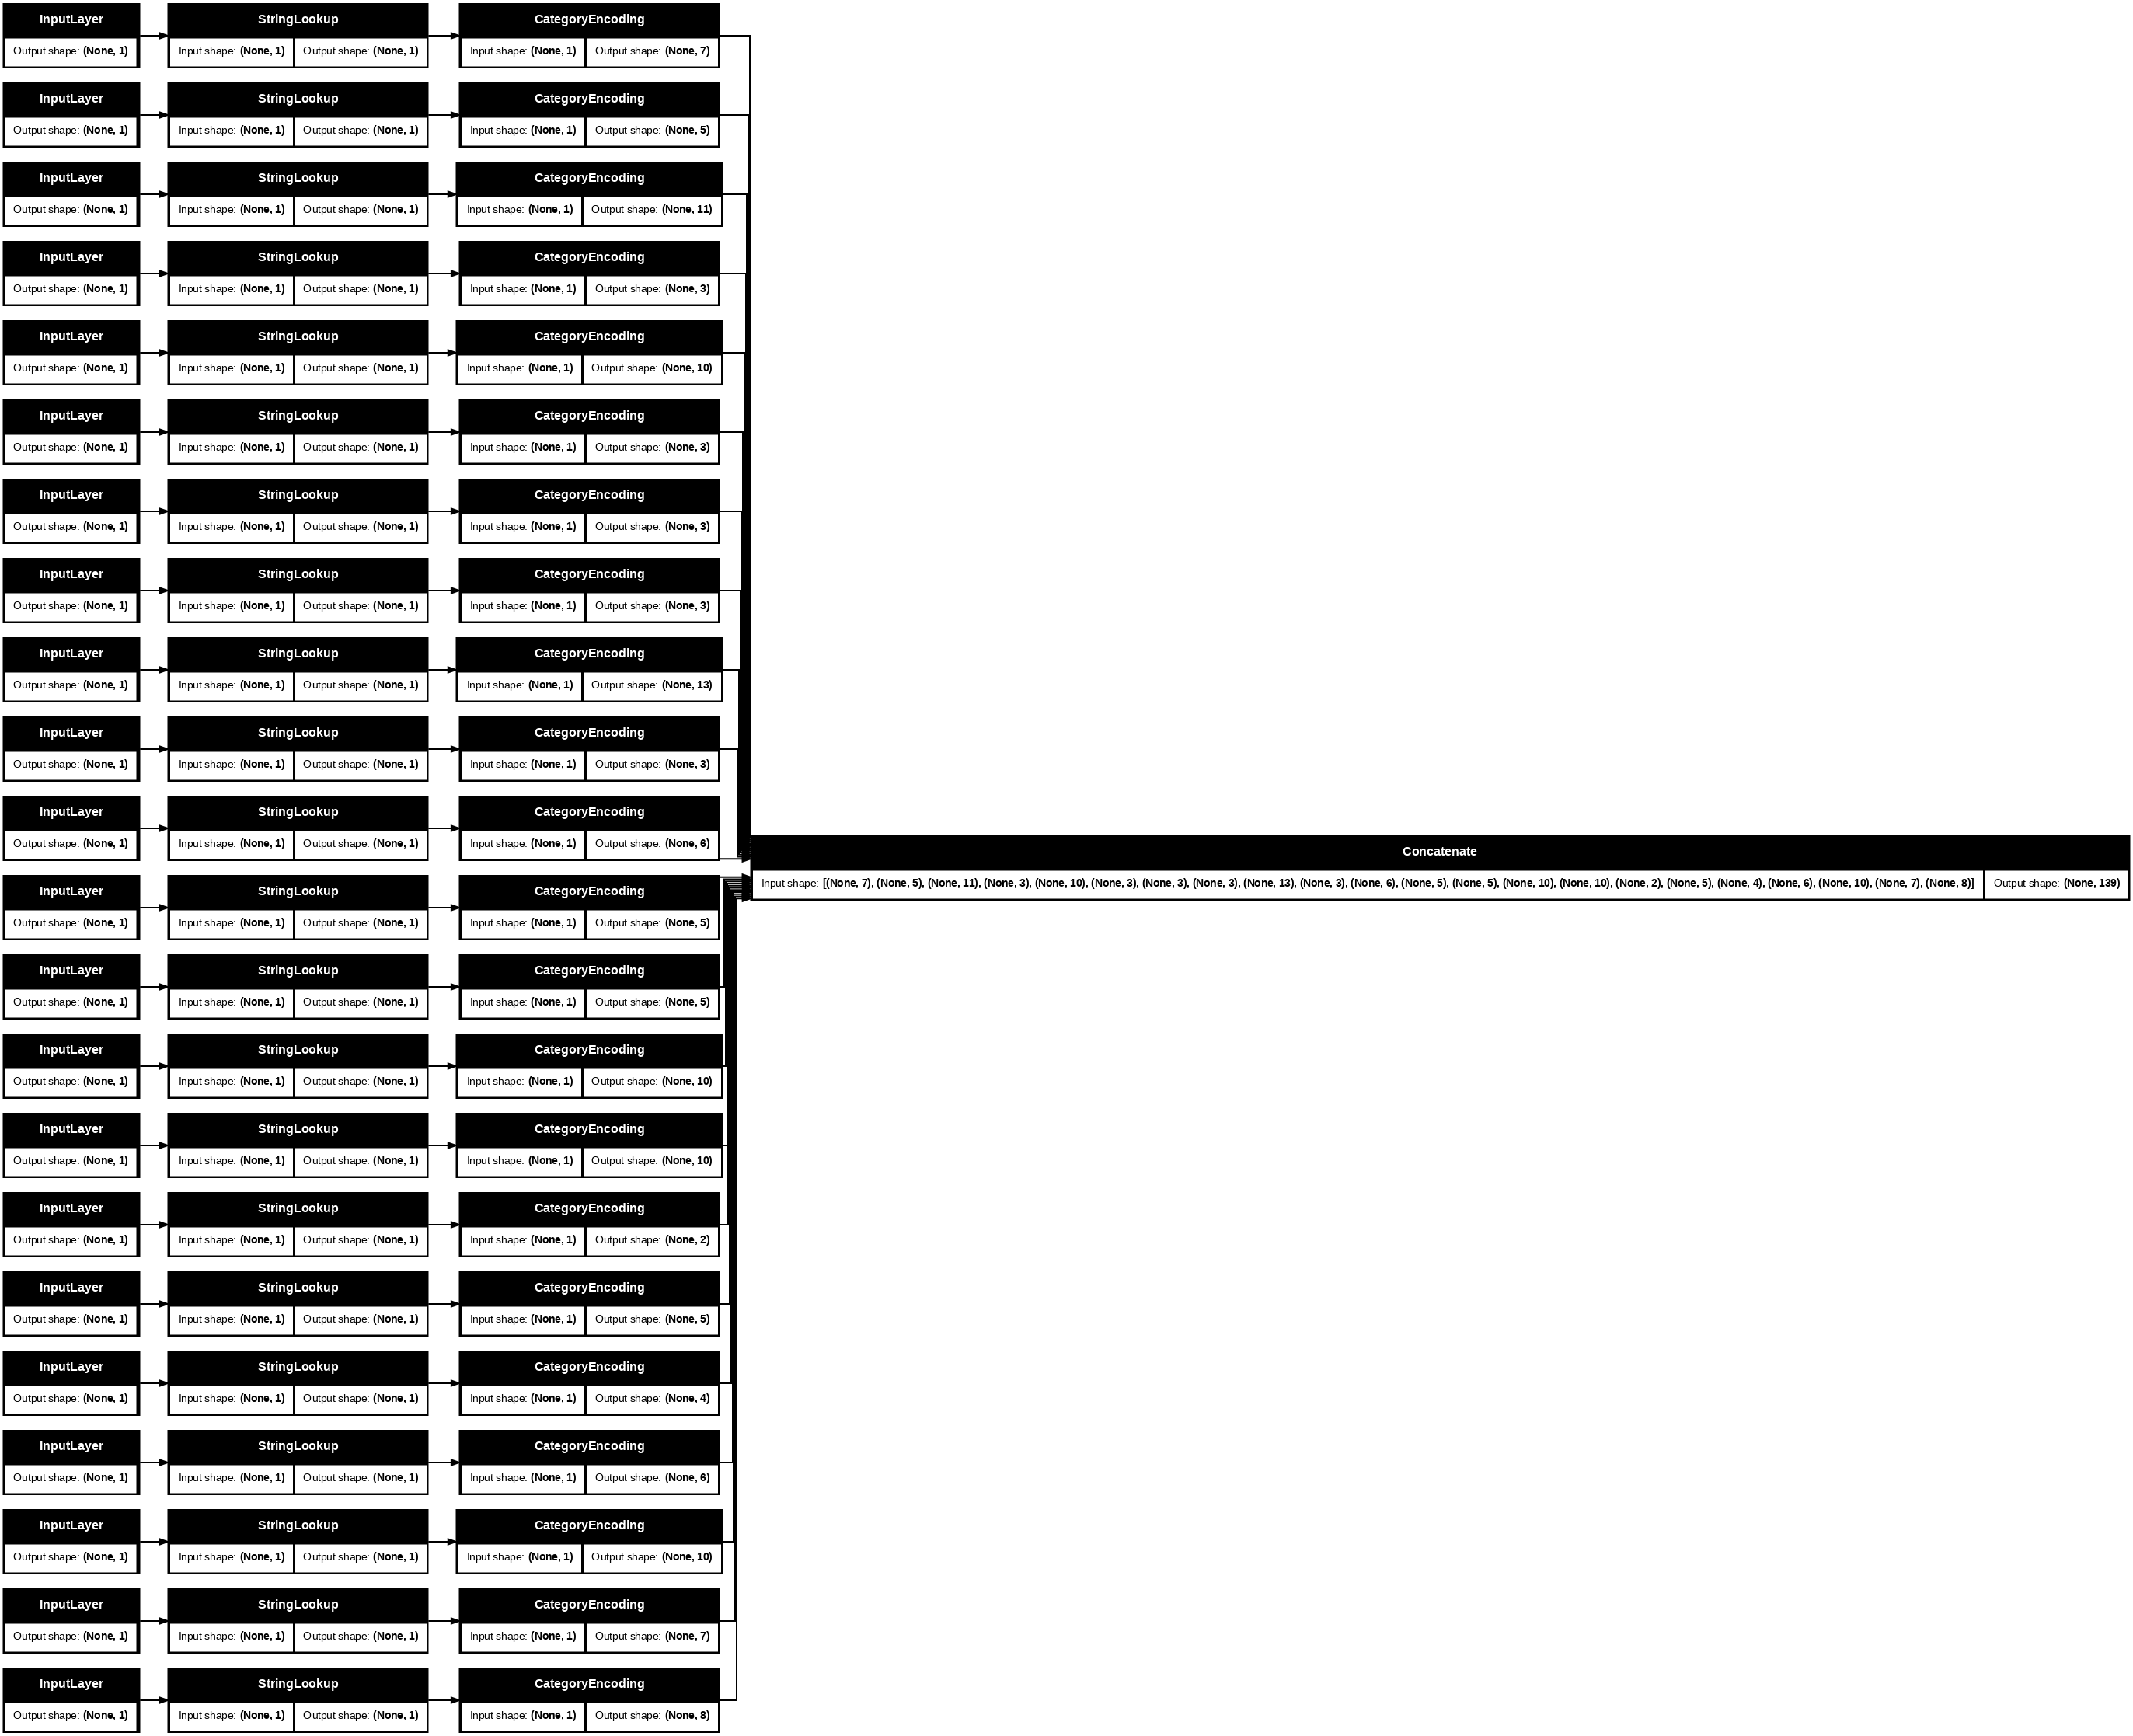

In [6]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

mushroom_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = mushroom_preprocessing, rankdir="LR", dpi=72, show_shapes=True)

In [7]:
mushroom_features_dict = {name: np.array(value)
                          for name, value in mushroom_features.items()}

In [8]:
features_dict = {name:values[:1] for name, values in mushroom_features_dict.items()}
mushroom_preprocessing(features_dict)

<tf.Tensor: shape=(1, 139), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)>

In [9]:
def create_mushroom_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
  return model

mushroom_model = create_mushroom_model(mushroom_preprocessing, inputs)

In [13]:
mushroom_model.fit(x=mushroom_features_dict, y=mushroom_labels, epochs=10)

Epoch 1/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 1.0000 - loss: 2.2747e-04
Epoch 2/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 1.0000 - loss: 1.5779e-04
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 1.5468e-04
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 1.0497e-04
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 9.5946e-05
Epoch 6/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 7.4015e-05
Epoch 7/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 6.3222e-05
Epoch 8/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 4.6772e-05
Epoch 9/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 3.7588e-05
Epoch 10/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 3.3594e-05


## Experiment: Activation Function and Optimizer
Modify the 1) Activation function 2) Optimizer of any chosen model. Try at least one model for each modified component.

Explain the motivation behind the modifications you made.

Explore the effects on the performance.


In [11]:
# Implementation and exploration.

## OPTIONAL. BONUS. Experiment: Loss Function

Modify the loss function of any chosen model.

Explain the motivation behind the modifications you made.

Explore the effects on the performance.


In [12]:
# Implementation and exploration.

No other directions for this assignment, other than what's here and in the "General Directions" section. You have a lot of freedom with this assignment. Don't get carried away. It is expected the results may vary, being better or worse, due to the limitations of the dataset. Graders are not going to run your notebooks. The notebook will be read as a report on how different models were explored. Since you'll be using libraries, the emphasis will be on your ability to communicate your findings.

## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".